In [29]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
df = pd.read_csv("outputs/combined_virality_modeling_data.csv")
print(f"Original shape: {df.shape}")
df = df.drop(columns=['event'], errors='ignore')
print(df.columns.tolist())


Original shape: (6412, 32)
['sourceTweetID     ', ' total_reactions', ' reactions_10min', ' reactions_1hr', ' reactions_24hr', ' lifespan_minutes      ', ' max_bin_reactions', ' num_time_bins', ' K                        ', ' r                 ', ' t0                 ', ' final_reactions', ' data_points', ' text_length', ' num_mentions', ' num_hashtags', ' num_urls', ' source_platform             ', ' hour_of_day', ' day_of_week', ' is_weekend', ' created_at_iso           ', ' user_id   ', ' followers_count', ' friends_count', ' statuses_count', ' favourites_count', ' verified', ' default_profile_image', ' geo_enabled', ' account_age_days', ' event']


In [49]:
bin_ranges = [0, 10, 20, 50, 100, 200, 500, 1000]
binned = pd.cut(df['total_reactions'], bins=bin_ranges)
counts = binned.value_counts().sort_index()

print("Distribution of 'total_reactions' in defined ranges:")
print(counts)

KeyError: 'total_reactions'

In [31]:
# Convert to numeric
df['total_reactions'] = pd.to_numeric(df['total_reactions'], errors='coerce')

# Drop non-numeric or irrelevant targets
df = df.drop(columns=['K', 'r', 't0', 'final_reactions', 'data_points'], errors='ignore')

# Print missing values in target
print(f"Missing total_reactions: {df['total_reactions'].isna().sum()}")


Missing total_reactions: 0


In [32]:
df = df.dropna(subset=['total_reactions']).copy()
print(f"Remaining rows after dropping NaNs in target: {df.shape}")

Remaining rows after dropping NaNs in target: (6412, 30)


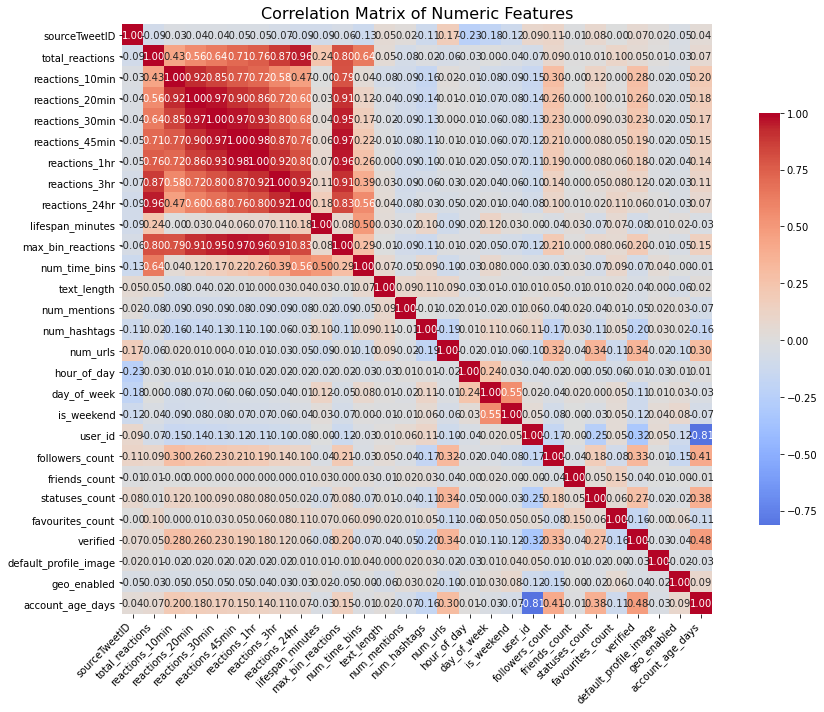

In [33]:
# Compute correlation matrix for all numeric columns (including target)
plt.figure(figsize=(14, 10))
numeric_cols = df.select_dtypes(include=[np.number])
corr_matrix = numeric_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'shrink': 0.7}, center=0)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [43]:
df.describe()

,sourceTweetID,total_reactions,reactions_10min,reactions_20min,reactions_30min,reactions_45min,reactions_1hr,reactions_3hr,reactions_24hr,lifespan_minutes,...,is_weekend,user_id,followers_count,friends_count,statuses_count,favourites_count,verified,default_profile_image,geo_enabled,account_age_days
count,6.412000e+03,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,...,6412.000000,6.412000e+03,6.412000e+03,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000,6412.000000
mean,5.397412e+17,94.943543,31.292265,42.679351,49.555209,56.710855,61.442920,76.543044,90.607299,875.315403,...,0.065502,3.118439e+08,1.161290e+06,3926.102776,50206.647224,3041.097629,0.521990,0.000624,0.371803,1824.317686
std,2.350373e+16,113.128437,29.862160,40.528040,47.944236,57.631205,63.640302,83.703968,104.602659,2320.166263,...,0.247429,6.202648e+08,3.175702e+06,18841.678577,58371.591547,10614.875817,0.499555,0.024971,0.483324,712.780096
min,4.982355e+17,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,6.000000,0.000000,...,0.000000,5.800000e+01,4.000000e+00,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,5.249664e+17,30.000000,12.000000,12.000000,12.000000,18.000000,18.000000,24.000000,30.000000,32.883333,...,0.000000,1.618016e+07,7.381750e+03,345.000000,8562.750000,27.000000,0.000000,0.000000,0.000000,1343.750000
50%,5.444319e+17,72.000000,24.000000,30.000000,36.000000,42.000000,48.000000,60.000000,72.000000,152.066667,...,0.000000,4.296460e+07,5.637800e+04,800.000000,26916.500000,350.000000,1.000000,0.000000,0.000000,2002.000000
75%,5.531668e+17,120.000000,42.000000,60.000000,72.000000,84.000000,90.000000,108.000000,120.000000,669.458333,...,0.000000,2.721721e+08,5.430000e+05,1758.000000,78151.000000,1558.250000,1.000000,0.000000,1.000000,2286.000000
max,5.815507e+17,2076.000000,456.000000,660.000000,810.000000,1032.000000,1110.000000,1602.000000,2040.000000,43725.366667,...,1.000000,3.077746e+09,2.530309e+07,453460.000000,621399.000000,208101.000000,1.000000,1.000000,1.000000,3094.000000


Distribution of 'reactions_10min' in defined ranges:
total_reactions
(0, 10]         681
(10, 20]        534
(20, 50]       1268
(50, 100]      1425
(100, 200]     1972
(200, 500]      454
(500, 1000]      63
Name: count, dtype: int64


In [34]:
training_features = [
    # Early engagement
    'reactions_10min', 'reactions_20min', 'reactions_30min', 'reactions_45min', 'reactions_1hr', 'reactions_3hr',
    
    # Tweet content
    'text_length', 'num_hashtags', 'num_mentions', 'num_urls',
    
    # User profile
    'followers_count', 'friends_count', 'statuses_count',
    'favourites_count', 'verified', 'account_age_days',
    
    # Temporal context
    'hour_of_day', 'day_of_week', 'is_weekend'
]


target_var = 'total_reactions'

# Keep only available features
feature_cols = [col for col in training_features if col in df.columns]
X = df[feature_cols].copy()
y = df[target_var].copy()
print(f"Using {len(feature_cols)} features: {feature_cols}")

Using 19 features: ['reactions_10min', 'reactions_20min', 'reactions_30min', 'reactions_45min', 'reactions_1hr', 'reactions_3hr', 'text_length', 'num_hashtags', 'num_mentions', 'num_urls', 'followers_count', 'friends_count', 'statuses_count', 'favourites_count', 'verified', 'account_age_days', 'hour_of_day', 'day_of_week', 'is_weekend']


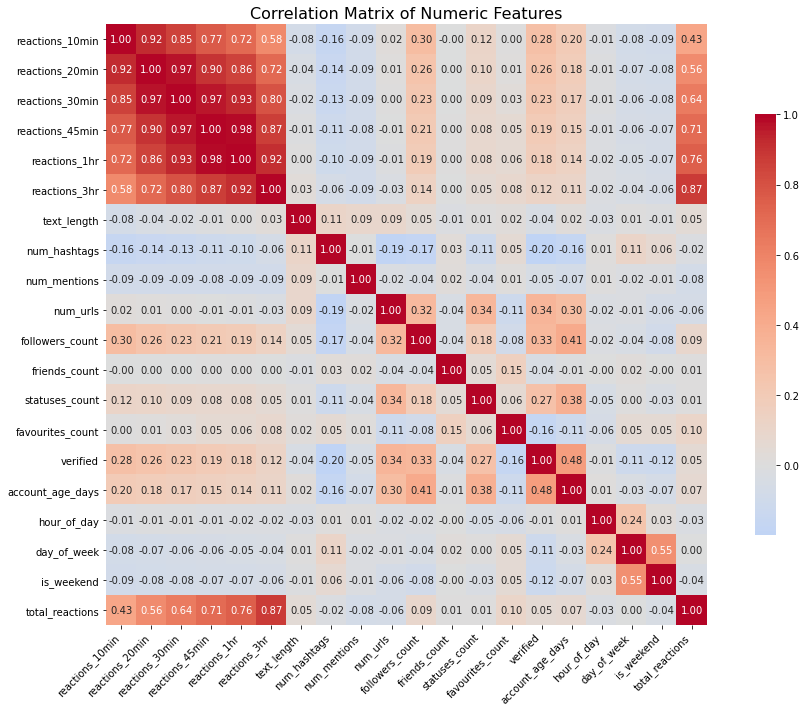

In [35]:
# Compute correlation matrix for all numeric columns (including target)
plt.figure(figsize=(14, 10))
# numeric_cols = df.select_dtypes(include=[np.number])
training_cols = df[training_features + [target_var]]
corr_matrix = training_cols.corr()

sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", square=True,
            cbar_kws={'shrink': 0.7}, center=0)
plt.title("Correlation Matrix of Numeric Features", fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


In [36]:
# Handle missing values
for col in X.select_dtypes(include=[np.number]):
    X[col] = X[col].fillna(X[col].median())

for col in X.select_dtypes(include=['object']):
    X[col] = pd.Categorical(X[col].fillna("unknown")).codes


In [37]:
print("=== total_reactions Statistics ===")
print(f"Mean: {y.mean():.2f}")
print(f"Std: {y.std():.2f}")
print(f"Min: {y.min():.2f}")
print(f"Max: {y.max():.2f}")


=== total_reactions Statistics ===
Mean: 94.94
Std: 113.13
Min: 6.00
Max: 2076.00


In [38]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [39]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor

models = {
    'Linear Regression': LinearRegression(),
    'Ridge Regression': Ridge(alpha=1.0),
    'Lasso Regression': Lasso(alpha=1.0),
    'Elastic Net': ElasticNet(alpha=1.0, l1_ratio=0.5),
    'Random Forest': RandomForestRegressor(n_estimators=100, random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=100, random_state=42),
    'SVR': SVR(kernel='rbf'),
    'KNN': KNeighborsRegressor(n_neighbors=5)
}

for name, model in models.items():
    print(f"\n=== {name} ===")
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    
    print(f"MSE: {mse:.2f}")
    print(f"R²: {r2:.4f}")




=== Linear Regression ===
MSE: 2127.05
R²: 0.8296

=== Ridge Regression ===
MSE: 2125.47
R²: 0.8297

=== Lasso Regression ===
MSE: 2070.96
R²: 0.8341

=== Elastic Net ===
MSE: 3189.26
R²: 0.7445

=== Random Forest ===
MSE: 3228.62
R²: 0.7414

=== Gradient Boosting ===
MSE: 2699.64
R²: 0.7837

=== SVR ===


Exception ignored on calling ctypes callback function: <function _ThreadpoolInfo._find_modules_with_dl_iterate_phdr.<locals>.match_module_callback at 0x7ba439555e50>
Traceback (most recent call last):
  File "/home/spellsharp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 400, in match_module_callback
    self._make_module_from_path(filepath)
  File "/home/spellsharp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 515, in _make_module_from_path
    module = module_class(filepath, prefix, user_api, internal_api)
  File "/home/spellsharp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 606, in __init__
    self.version = self.get_version()
  File "/home/spellsharp/anaconda3/lib/python3.8/site-packages/threadpoolctl.py", line 646, in get_version
    config = get_config().split()
AttributeError: 'NoneType' object has no attribute 'split'


MSE: 9397.11
R²: 0.2472

=== KNN ===
MSE: 4897.22
R²: 0.6077


In [44]:
y_train_pred = models['Lasso Regression'].predict(X_train_scaled)
y_test_pred = models['Lasso Regression'].predict(X_test_scaled)

mse = mean_squared_error(y_test, y_test_pred)
r2 = r2_score(y_test, y_test_pred)

print(f"MSE: {mse:.2f}")
print(f"R²: {r2:.4f}")

MSE: 2070.96
R²: 0.8341


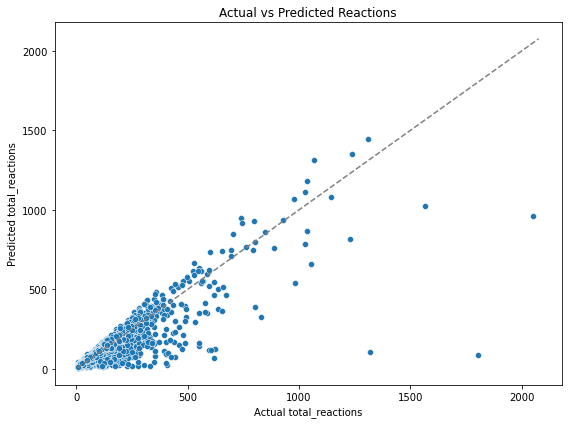

In [45]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_train, y=y_train_pred)
plt.xlabel("Actual total_reactions")
plt.ylabel("Predicted total_reactions")
plt.title("Actual vs Predicted Reactions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.tight_layout()
plt.show()

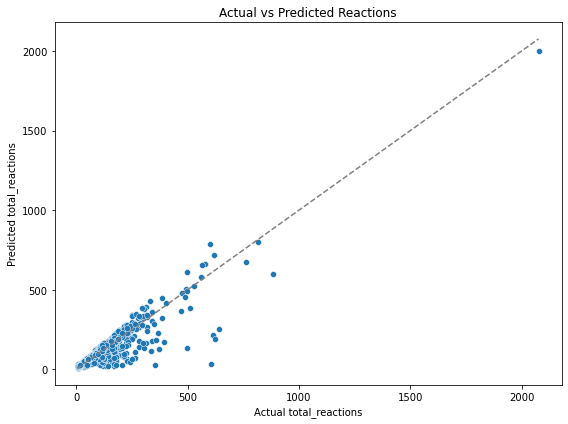

In [46]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_test_pred)
plt.xlabel("Actual total_reactions")
plt.ylabel("Predicted total_reactions")
plt.title("Actual vs Predicted Reactions")
plt.plot([y.min(), y.max()], [y.min(), y.max()], '--', color='gray')
plt.tight_layout()
plt.show()

In [27]:
df.columns

Index(['sourceTweetID', 'total_reactions', 'reactions_10min', 'reactions_1hr',
       'reactions_24hr', 'lifespan_minutes', 'max_bin_reactions',
       'num_time_bins', 'text_length', 'num_mentions', 'num_hashtags',
       'num_urls', 'source_platform', 'hour_of_day', 'day_of_week',
       'is_weekend', 'created_at_iso', 'user_id', 'followers_count',
       'friends_count', 'statuses_count', 'favourites_count', 'verified',
       'default_profile_image', 'geo_enabled', 'account_age_days'],
      dtype='object')

In [28]:
df.lifespan_minutes.describe()

count     6412.000000
mean       875.315403
std       2320.166263
min          0.000000
25%         32.883333
50%        152.066667
75%        669.458333
max      43725.366667
Name: lifespan_minutes, dtype: float64